## EE 461P: Data Science Principles  
### Assignment 4 
### Total points: 85
### Due: Thursday, April 7, 2022, submitted via Canvas by 11:59 pm  

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s) and EID(s):
1. Harshika Jha hj6963
2. Jared McArthur jtm4343

### Homework group No.: 

# Question 1 : Principal Component Analysis [25 points]

This questions involves applying Principal Component Analysis to a dataset of handwritten digits for the digit 2. Before starting with the assignment, I would recommend going through the PCA algorithm through this [excellent resource](https://drive.google.com/file/d/1uEJTQa7wgJh6WhhmJwlmBKzyGNSb_swq/view?usp=sharing) [Pages 12-20] if you have any doubts about the process.

## Downloading and pre-processing data

The dataset consists of 5958 images of the handwritten digit 2. Each image is of shape 28x28.

On running the cells in this section, you will find the numpy array, `data`.

`data` is a numpy array of size (5958, 784).

Each row in `data` consists of a single image, with all the 28x28 pixel values flattened into a single row of 784 values. 


You are also provided with code on how to plot an image for visualisation.



In [ ]:
import os
import torch
import torchvision
import numpy as np
from time import time
from torch import nn, optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from copy import deepcopy

In [ ]:
# Downloading MNIST dataset and storing as torch.utils.data.Dataset
transform = transforms.Compose([transforms.ToTensor()
                              ])

tensor = datasets.MNIST('/content/data/train', download=True, train=True, transform=transform)
data = np.reshape(tensor.data.numpy(), (60000, 784))
targets = tensor.targets.numpy()

data = data[targets == 2]

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/data/train/MNIST/raw/train-images-idx3-ubyte.gz to /content/data/train/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/data/train/MNIST/raw/train-labels-idx1-ubyte.gz to /content/data/train/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/data/train/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/data/train/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/data/train/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/data/train/MNIST/raw



Number of samples 5958
Training sample image dimension (784,)
Training sample image label 5


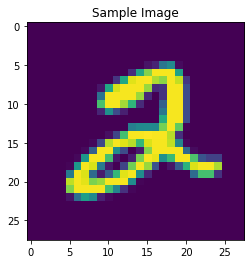

In [ ]:
# Sanity checking dataset
print("Number of samples", len(data))
print("Training sample image dimension",data[0].shape)
print("Training sample image label",targets[0])
plt.title("Sample Image")
plt.imshow(np.reshape(data[0], (28,28)))

## Analysis

a) [5 points] Compute the mean $ (\mu) $ of all the data-points. You will be computing the mean along the rows. The mean will be of shape (784,)

[Hint : Use [np.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) to compute mean along axis = 0)

In [ ]:
mean = np.mean(data, axis = 0)
mean

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.23747990e-17,  8.29783633e-16,  8.29783633e-16,  3.70487059e-17,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.50797904e-17,
       -1.22374230e-15,  1.29420969e-15,  1.59686799e-15,  5.77095158e-16,
        9.53775308e-16, -1.50907316e-15, -3.07258601e-15,  1.80498822e-15,
        5.99654599e-15, -4.93592709e-15,  2.96389647e-16,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

b) [5 points] Compute the covariance matrix ($C$) of all the datapoints. Firstly, subtract the mean that you have computed from the previous part from each of the rows, so that the data now has zero mean. The covariance matrix for the digit 2 is of shape (784, 784).

[Hint : Use [np.cov](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) to compute the covariance matrix. Use [np.transpose](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html) so that observations are considered along the columns, as required by `np.cov`].


In [ ]:
data = mean - data
covMatrix = np.cov(data,bias=True)
covMatrix

array([[ 3749.39974006,   121.44627507,  -286.23556295, ...,
          929.03193896,   683.18769185,   185.93233799],
       [  121.44627507,  3317.89133544,  -414.57783729, ...,
          249.80187047,  -186.39346407,    32.94492881],
       [ -286.23556295,  -414.57783729,  4432.25275441, ...,
        -1320.71269349, -1317.86398064, -1358.46910413],
       ...,
       [  929.03193896,   249.80187047, -1320.71269349, ...,
         4747.05444398,  2871.22377195,  1350.80469724],
       [  683.18769185,  -186.39346407, -1317.86398064, ...,
         2871.22377195,  4971.26362098,  2525.78346658],
       [  185.93233799,    32.94492881, -1358.46910413, ...,
         1350.80469724,  2525.78346658,  4017.65214958]])

c) [5 points] Now, we compute the eigenvalues ($\lambda$) of the covariance matrix ($C$), sort them in descending order of magnitude, and plot the top 70 eigenvalues. What does this plot indicate to you?

[Hint : Use [np.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html) to compute the eigenvalues and corresponding eigenvectors of a matrix. It returns the eigenvalues already sorted in descending order. Note that the eigenvectors are arranged along the columns.Use [np.real](https://numpy.org/doc/stable/reference/generated/numpy.real.html) to get the real part of the eigenvalues and eigenvectors.]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

In [ ]:
results = la.eig(covMatrix)
results

(array([2.97929087e+06+0.j, 1.93914265e+06+0.j, 1.31535902e+06+0.j, ...,
        1.60299997e-12+0.j, 3.01758688e-12+0.j, 2.19943116e-12+0.j]),
 array([[ 1.37629423e-02+0.j, -1.01005297e-02+0.j, -4.45989957e-03+0.j,
         ..., -6.36269145e-03+0.j, -1.02469542e-03+0.j,
          3.04743974e-03+0.j],
        [ 3.67448581e-03+0.j,  1.68684621e-03+0.j, -1.06735691e-04+0.j,
         ..., -5.76292645e-04+0.j, -2.67826426e-05+0.j,
          1.14205977e-04+0.j],
        [-8.84659025e-03+0.j,  1.93315229e-02+0.j,  1.02622604e-02+0.j,
         ..., -2.91054207e-04+0.j, -3.63355990e-04+0.j,
          1.10267249e-04+0.j],
        ...,
        [ 1.82203516e-02+0.j, -1.25379998e-02+0.j, -8.23122148e-03+0.j,
         ...,  7.18731272e-03+0.j,  4.49584158e-03+0.j,
         -7.39514816e-04+0.j],
        [ 2.71797398e-02+0.j, -5.98742823e-03+0.j, -5.11434404e-03+0.j,
         ..., -8.49038421e-04+0.j,  2.32652374e-03+0.j,
         -8.12376611e-03+0.j],
        [ 1.87854967e-02+0.j, -4.00161755e-03+0.j

In [ ]:
real = np.real(covMatrix)
real

array([[ 3749.39974006,   121.44627507,  -286.23556295, ...,
          929.03193896,   683.18769185,   185.93233799],
       [  121.44627507,  3317.89133544,  -414.57783729, ...,
          249.80187047,  -186.39346407,    32.94492881],
       [ -286.23556295,  -414.57783729,  4432.25275441, ...,
        -1320.71269349, -1317.86398064, -1358.46910413],
       ...,
       [  929.03193896,   249.80187047, -1320.71269349, ...,
         4747.05444398,  2871.22377195,  1350.80469724],
       [  683.18769185,  -186.39346407, -1317.86398064, ...,
         2871.22377195,  4971.26362098,  2525.78346658],
       [  185.93233799,    32.94492881, -1358.46910413, ...,
         1350.80469724,  2525.78346658,  4017.65214958]])

In [ ]:
C = 1 / len(data) * np.dot(data.T, data)
U, w, VT = np.linalg.svd(C, compute_uv=True)
print(w)
print(U)

[3.96868515e+05 2.63283910e+05 2.05144748e+05 1.67111181e+05
 1.64733709e+05 1.36615552e+05 1.14237485e+05 9.86420570e+04
 8.08690900e+04 7.75877676e+04 7.47904414e+04 6.13993993e+04
 5.79597367e+04 5.53569033e+04 5.01280912e+04 4.55348626e+04
 4.48845828e+04 4.02645787e+04 3.85796218e+04 3.66780202e+04
 3.35400911e+04 3.21086530e+04 3.03816715e+04 2.82695054e+04
 2.72213405e+04 2.63613277e+04 2.45293584e+04 2.30842957e+04
 2.19717334e+04 2.14592384e+04 1.98637525e+04 1.92580932e+04
 1.90991777e+04 1.80672082e+04 1.70947415e+04 1.62227367e+04
 1.59683183e+04 1.53590306e+04 1.48036959e+04 1.45532577e+04
 1.37216234e+04 1.29787004e+04 1.27195706e+04 1.25070555e+04
 1.15814449e+04 1.10925879e+04 1.08561169e+04 1.04515446e+04
 1.03511097e+04 1.01105982e+04 9.73291925e+03 9.54879041e+03
 9.43354640e+03 9.14559766e+03 8.64311106e+03 8.31965538e+03
 8.12575124e+03 7.77033023e+03 7.72303510e+03 7.56973031e+03
 7.35402997e+03 6.96238961e+03 6.88280459e+03 6.57979994e+03
 6.35252801e+03 6.272020

In [ ]:
def find_eigenvalues_and_eigenvectors(A):
    C = 1 / len(A) * np.dot(A.T, A)
    
    #compute eigenvalues and eigen vectors
    U, w, VT = np.linalg.svd(C, compute_uv=True)
    return w, U
eigenvalues, eigenvectors = find_eigenvalues_and_eigenvectors(data)
print(eigenvalues.shape)


sort_index = np.argsort(eigenvalues)[::-1]

eigenvalues= eigenvalues[sort_index]
eigenvectors = eigenvectors[:, sort_index]


print(eigenvalues[:70])
print(eigenvectors[:70])

(784,)
[396868.51455854 263283.90999433 205144.74842901 167111.18063085
 164733.70858437 136615.55154665 114237.4851964   98642.0570169
  80869.08999456  77587.7675947   74790.44141963  61399.39929974
  57959.73669142  55356.90328204  50128.09120004  45534.86257964
  44884.58281     40264.57874844  38579.62184869  36678.02017454
  33540.09107589  32108.65300452  30381.67154527  28269.50542535
  27221.34050295  26361.32769293  24529.35840028  23084.29569691
  21971.73336337  21459.2383828   19863.75248036  19258.09317448
  19099.17766664  18067.2081943   17094.74148085  16222.7367272
  15968.31834065  15359.03055666  14803.69593856  14553.25770111
  13721.62338956  12978.70040399  12719.57061732  12507.05546315
  11581.44486048  11092.58787458  10856.1169368   10451.54455682
  10351.10968505  10110.59817594   9732.91925171   9548.79040754
   9433.54640353   9145.59766051   8643.11105809   8319.655383
   8125.7512353    7770.33022582   7723.0351001    7569.73030826
   7354.02996736   696

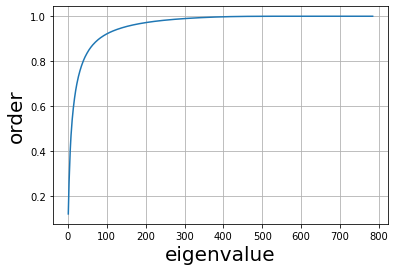

In [ ]:
M = np.array(range(1, data.shape[1] + 1))

r = np.cumsum(eigenvalues)/np.sum(eigenvalues)

# Plot r vs M
plt.plot(M, r)

plt.xlabel("eigenvalue", fontsize=20)
plt.ylabel("order", fontsize=20)
plt.grid("on")
plt.show()

d) [5 points] Again for the digit 2, show the  3 images side-by-side corresponding to: i) $\mu$, ii) $\mu - \sqrt{\lambda_{1}}*v_{1}$ and iii) ii) $\mu + \sqrt{\lambda_{1}}*v_{1}$ to show the principal mode of variation of the digits around their mean. For this particular digit, 2, what do the principal mode of variation tell you about the main differences in how  people write this digit? 
Feel free to repeat parts (c) and (d) for other digits as well to find interesting trends!


[Hint : Use the code from the Data pre-processing section to plot a (784,) shaped vector as a (28,28) image]

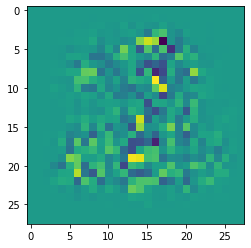

In [ ]:
import math
plt.imshow(np.reshape(mean, (28,28)))

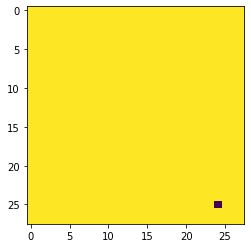

In [ ]:
plt.imshow(np.reshape(mean - math.sqrt(np.real(eigenvalues[0])) * np.real(eigenvectors[0]), (28,28)))

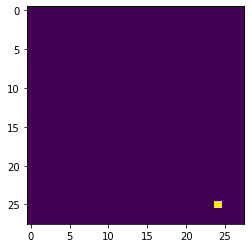

In [ ]:
plt.imshow(np.reshape(mean + math.sqrt(np.real(eigenvalues[0])) * np.real(eigenvectors[0]), (28,28)))

e) [5 points] For this part, we will try to see how the principal components can be used to compress and reconstruct the data. Follow the steps given below - 

1) Consider the eigenvectors corresponding to the top 5 highest eigenvalues computed in part (c). Arrange them in a matrix such that each row is one of the eigenvectors. Let's call this matrix $P$. This will of shape $(5,784)$.

2) Recall that the data matrix given to you is of shape $(5958, 784)$. Subtract the mean $\mu$ computed in part (a) from this data matrix from each row so that the data is now zero mean. Let's call this matrix $D$.

3) Now we project the data onto the first 5 principal components. To perform this operation, compute $D^{'} = D \times P^{T}$, i.e, matrix multiply $D$ and the transpose of $P$. This new data matrix $D^{'}$ represents your compressed data. The shape of this matrix should be $(5958, 5)$. Notice how it has been reduced substantially from the previous shape of $(5958, 784)$.

4) Next, we will try to reconstruct our original data back and see how much information we have lost. To reconstruct the data, we perform the following operation - $R = D^{'} \times P  + \mu$, where $\mu$ is added to each row. The matrix $R$ is again going to be of the shape $(5958, 784)$, but it is going to be different from our original data matrix. To show this, take the first row from the original data (without subtracting the mean) and the first row of $R$ and plot both the images alongside each other, and also plot the difference of the two images.

Repeat this process after considering 50 eigenvectors instead of 5. What do you expect to observe? Note your observations.

[Use [np.matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) to perform matrix multiplication]



In [ ]:
def find_eigenvalues_and_eigenvectors(A):
    C = 1 / len(A) * np.dot(A.T, A)
    
    #compute eigenvalues and eigen vectors
    U, w, VT = np.linalg.svd(C, compute_uv=True)
    return w, U
eigenvalues, eigenvectors = find_eigenvalues_and_eigenvectors(data)
print(eigenvalues.shape)


sort_index = np.argsort(eigenvalues)[::-1]

eigenvalues= eigenvalues[sort_index]
eigenvectors = eigenvectors[:, sort_index]


print(eigenvalues[:50])
print(eigenvectors[:50])

(784,)
[396868.51455854 263283.90999433 205144.74842901 167111.18063085
 164733.70858437 136615.55154665 114237.4851964   98642.0570169
  80869.08999456  77587.7675947   74790.44141963  61399.39929974
  57959.73669142  55356.90328204  50128.09120004  45534.86257964
  44884.58281     40264.57874844  38579.62184869  36678.02017454
  33540.09107589  32108.65300452  30381.67154527  28269.50542535
  27221.34050295  26361.32769293  24529.35840028  23084.29569691
  21971.73336337  21459.2383828   19863.75248036  19258.09317448
  19099.17766664  18067.2081943   17094.74148085  16222.7367272
  15968.31834065  15359.03055666  14803.69593856  14553.25770111
  13721.62338956  12978.70040399  12719.57061732  12507.05546315
  11581.44486048  11092.58787458  10856.1169368   10451.54455682
  10351.10968505  10110.59817594]
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.      

# Question 2 [10 points]

Use two vectors $v_1=[1 , 1 , 1 ,  1 ,  1 , 1]^T$ and $v_2=[-2 , 1 , -3 ,  4 ,  -1 , 1]^T$, to sample $10000$ data points from the distribution of random variable $U \in R^6$ defined as
$$U=Xv_1+Yv_2 + Z$$ 
such that $X\sim N(1,\sigma^2)$ and $Y\sim N(-1,\sigma^2)$, and $Z \in R^6$ is zero mean gaussian noise with covariance matrix $\eta^2 I_{6 \times 6}$ (where $I_{6 \times 6}$ is the identity matrix). This means that we are adding zero mean gaussain noise with variance $\eta^2$ in all six dimensions independently. Let $\eta^2 << \sigma^2$. Generate the data using $\sigma^2=4$ and $\eta^2=0.01$ and obtain a scree plot. How many principal components are needed to explain most of the variance in your data? Briefly explain why this answer makes intuitive sense given the data generation process.

In [ ]:
from re import T
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
v1 = np.array([1,1,1,1,1,1])
v2 = np.array([2,1,3,4,1,1])


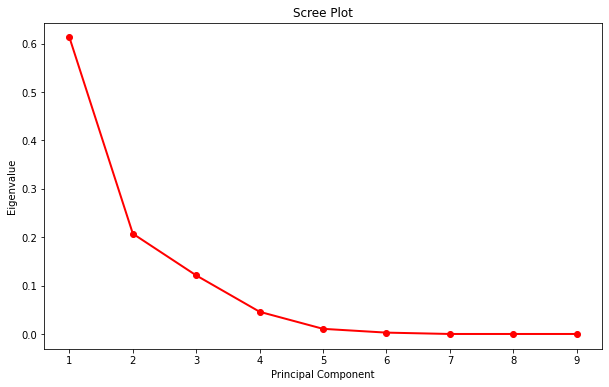

In [ ]:
N=np.matrix(v1.T)*np.matrix(v2)
A,B,C=np.linalg.svd(N)
eigen_values=B**2/np.sum(B**2)
figure=plt.figure(figsize=(10,6))
sing_vals=np.arange(len(eigen_values)) + 1
plt.plot(sing_vals,eigen_values, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue') 
plt.show() 

# Question 3 - Expected Loss Minimization (10 pts)
Consider a binary classification problem with the following loss matrix -
$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & r & c  \\
   & C2 & s & 0 & c \\
  \end{array} } 
$$
where the cost of rejection is a constant, and the costs $r$ and $s$ are positive real numbers. Let $f(x)=P(C1|x)$.


**(a) [2.5 points]** Show that the expected loss when $x$ is labelled as $C_1$ is a decreasing function of $f(x)$ while expected loss when $x$ is labelled as $C_2$ is a increasing function of $f(x)$.  

**(b) [2.5 points]** For $c=0$, show that the decision which minimizes the expected loss is to reject all instances of $x$

**(c) [2.5 points]** Let $r=4$ and $s=1$, what is the minimum value of $c$ required so that we reject no instance of $x$ for any $f(x)$?

**(d) [2.5 points]** Let $r=3$, $s=2$, and $c=1$. Determine the  ranges of $f(x)$ for which the optimal decision is C1, reject, and C2 respectively.



https://drive.google.com/file/d/1H8ONHSrfsnhRoCOWnWgxag3BE0FbEMqX/view?usp=sharing 

# Question 4 [5 points]

Suppose each  point  $x\in R^n$ belongs to one out of six classes. The conditional distribution of $x$ given class $k=i$ (where $i\in\{1,2,3,4,5,6\}$) is given by

$f(x|k=i)=e^{-g(x,\mu_i,\Sigma_i)}$

where $\mu_i\in R^n$ is the mean of the points in class $i$ and $\Sigma_i \in R^n \times R^n$ is the covariance matrix for points in class $i$. Suppose that we have learned these parameters during training, and we also know the prior probabilities $\pi_i=Pr[k=i]$. For classification of a given point $x$ during the testing phase, our predicted class is $\hat{i}(x)=\arg max_i Pr(k=i|x)$

**(a) [1 points]** Under what distribution of $\pi_i$ do we obtain $\arg max_i Pr(k=i|x) = \arg max_i f(x|k=i)$. (Hint: Use Bayes Rule)

**(b) [4 points]** For the distribution of $\pi$ obtained in part (a), show that $\hat{i}(x)=\arg max_i Pr(k=i|x)$ simplifies to $\hat{i}(x)=\arg min_i g(x,\mu_i,\Sigma_i)$ 


https://drive.google.com/file/d/1F-34Jutd1EiUYi0Pzw7AfuYbXTcfIRwd/view?usp=sharing

# Question 5 [5 points]
Consider the problem of predicting the success of students in grad school given their undergraduate GPA and GRE scores. We have the variables $X_1 =$ undergradutate GPA, $X_2$ = GRE score and Y = completing the graduate school (binary). We then fit a logistic regression which produces coefficients, $β_0 = −6$, $β_1 = 1$, $β_2 = 0.01$ Estimate the probability that George who
has a GPA of 3.0 and a GRE score of 320 will complete graduate school successfully according to this model. By how much will the probability increase if the GPA increases to 3.5, with other factors remaining the same?


p = exp(-6 + 1 * GPA + .01 * GRE) / (1 + exp(-6 + 1 * GPA + .01 * GRE)) p = exp(-6 + 1 * 3.0 + .01 * 320) / (1 + exp(-6 + 1 * 3.0 + .01 * 320)) = .5498 p = exp(-6 + 1 * 3.5 + .01 * 320) / (1 + exp(-6 + 1 * 3.5 + .01 * 320)) = .6682

probability increases by (.6682 - .5498) = 0.1184